<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/02_04_csv_file_handling_mnist_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 2-4 : File handling**


- *Colab의 /content/sample_data directory 안에 있는 mnist csv file을 읽어 출력해 본다*


## **Sample_data 안의 내용을 확인**

In [0]:
!pwd
!ls -al sample_data/

/content
total 55512
drwxr-xr-x 1 root root     4096 Dec  6 16:53 .
drwxr-xr-x 1 root root     4096 Dec  6 16:53 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Dec  6 16:53 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Dec  6 16:53 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Dec  6 16:53 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Dec  6 16:53 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


## **Import Module**

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

## **Mount**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Import aidlutils**

In [0]:
import sys
#sys.path.append('/content/drive/Shared drives/scsa_2019_e/aidl-utils/basic')
sys.path.append('/content/drive/Shared drives/scsa_2019_c/07_kyn')

import aidlutils as aidl

## **CSV file structure**

- *첫 column = label*
- *나머지 = 이미지 데이타*


In [0]:
#shell cmd 사용
!head {'/content/sample_data/mnist_train_small.csv'}

6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,67,67,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,252,252,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,250,232,30,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,222,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,252,183,5,0,0,0,0,0,0,0,20,89,89,73,0,0,0,0,0,0,0,0,0,0,0,0,48,247,252,159,0,0,0,0,0,0,0,79,236,252,252,249,198,16,0,0,0,0,0,0,0,0,0,41,193,252,199,22,0,0,0,0,0,12,135,248,252,252,252,252,252,100,0,0,0,0,0,0,0,0,0,100,252,252,88,0,0,0,0,0,11,171,252,252,235,175,178,252,252,224,0,0,0,0,0,0,0,0,15,209,252,233,12,0,0,0,0,49,177,252,252,89,26,0,2,166,252,252,0,0,0,0,0,0,0,0,96,253,253,59,0,0,0,0,11,177,255,253,92,0,0,0,0,155,253,128,0,0,0,0,0,0,0,0,143,252,252,10,0,0,0,12,171,252,216,110,13,0,0,0,3,180,

In [0]:
mnist_csv_train = '/content/sample_data/mnist_train_small.csv'
minst_csv_test = '/content/sample_data/mnist_test.csv'

In [0]:
import numpy as np

In [0]:
data_train=np.loadtxt(mnist_csv_train, delimiter=',') #delimiter지정필요
data_test=np.loadtxt(minst_csv_test, delimiter=',')

print("shape of mnist_csv_train :", data_train.shape)
print("shape of minst_csv_test :", data_test.shape)
# (data 개수, 28*28+1 == pixel이 28*28이고, 맨 처음에 Class정보 하나까지 추가해서 785개!!)

shape of mnist_csv_train : (20000, 785)
shape of minst_csv_test : (10000, 785)


In [0]:
data_train.shape,data_test.shape, type(data_train)

((20000, 785), (10000, 785), numpy.ndarray)

In [0]:
x_train, y_train = data_train[:, 1:], data_train[:, 0]
x_test, y_test = data_test[:, 1:], data_test[:, 0]
# x : 맨 앞의 class 정보를 제외한 이미지 data를 받기 위함
# y : 맨 앞의 class 정보만을 받기 위함 -> 이렇게 데이터를 x와 y로 나눔!

In [0]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20000, 784), (20000,), (10000, 784), (10000,))

### Pandas module로 읽기

In [0]:
import pandas as pd

In [0]:
data_train = pd.read_csv(mnist_csv_train, header=None) # header주의!!!!
data_test = pd.read_csv(minst_csv_test, header=None)
# 즉, header가 없는 csv 파일일 경우, 없음애도 python에서는 header가 있음을 가정하고 앞부분을 헤더로 치고 빼버림!!

In [0]:
data_train.shape, data_test.shape,type(data_train)

((20000, 785), (10000, 785), pandas.core.frame.DataFrame)

In [0]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#train
y_train = np.array(data_train.iloc[:, 0]) # Data type 변경
x_train = np.array(data_train.iloc[:, 1:])

#test
y_test = np.array(data_test.iloc[:, 0])
x_test = np.array(data_test.iloc[:, 1:])


print("x shape :", x_train.shape, x_test.shape)
#features
n_features_train = x_train.shape[1]
n_samples_train = x_train.shape[0]
n_features_test = x_test.shape[1]
n_samples_test = x_test.shape[0]
print(n_features_train, n_samples_train, n_features_test, n_samples_test)
print(x_train.shape, y_train.shape, x_test.shape, type(x_train))

x shape : (20000, 784) (10000, 784)
784 20000 784 10000
(20000, 784) (20000,) (10000, 784) <class 'numpy.ndarray'>


## **Show_img(): mnist image**

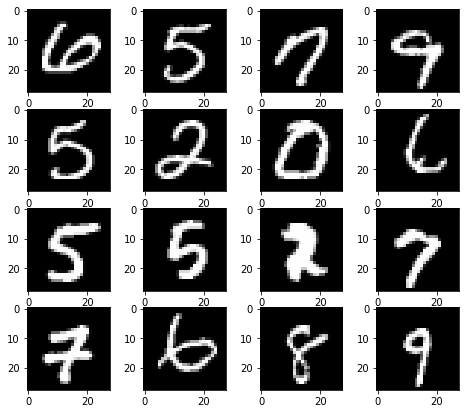

In [0]:
import matplotlib.pyplot as plt
import aidlutils as aidl

aidl.show_img(x_train)

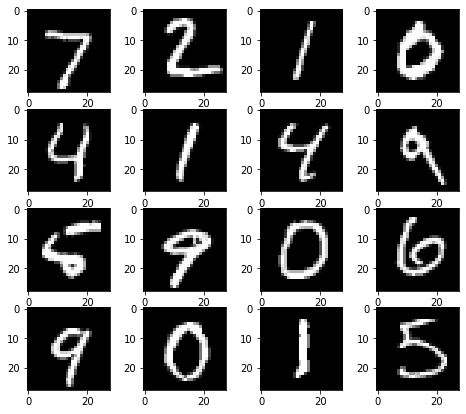

In [0]:
aidl.show_img(x_test)

## **실습 과제**

### 과제1 이 dataset을 오늘 실습한 model로 training해 보자.
#### -- 02_03 코드를 02_03_01로 복사하고 Data set을 위에 있는 np.loadtxt()를 사용하도록 수정하여 실행하자.



